In [270]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [97]:
# loadinf data
data_dir1 = "data\ex1data1.txt"
data1 = np.loadtxt(data_dir1 ,delimiter=',', unpack = True)
X = np.array(data1[:1]).T
y = np.array(data1[1:]).T

In [263]:
class LinearRegression():
    """ 
    This class is made for training a model of linear regression
    """
    def __init__(self):
        """
        The constractor of the LinearRegression object
        """
        self.theta = np.zeros((2,1))
        
    def fit(self, X, y,iterations = 1500, alpha = 0.01, save_cost = False, save_theta = False):
        """
        Trains the Linear-Regression model.
        the model's weights are optimized using batch gradient descent
        X - the input data
        y - target (expected output for the data)
        iterations - number of gradient descent iterations, defaulted to be 1500
        alpha - step size, defaulted to be 0.01
        save_cost - if True, fit will return a list of the cost-function's values
        save_theta - if True, fit will return a list of theta's values
        """
        X = np.insert(X, 0,1,axis=1)
        m = len(y)
        cost_list = []
        theta_list = []
            
        for i in range(iterations):
            y_hat =  X @ self.theta
            step = X.T @ (y_hat - y) / m
            self.theta -= alpha * step
                        
            # documenting the values of theta and the cost-function
            if (save_cost or save_theta) and i%10 == 0:
                if save_cost:
                    cost = ((y_hat-y).T @ (y_hat-y) / (2*m)).item()
                    cost_list.append(cost)
                if save_theta:
                    tmp = (self.theta[0].item(),self.theta[1].item())
                    theta_list.append(tmp)
                    
        return {"cost":cost_list, "theta":theta_list}
    
    def predict(self, X):
        """
        X - input data
        returns a prediction using the linear model
        """
        y_hat = X @ self.theta 
        return y_hat   

In [266]:
def visualize(X, y, theta):
        """
        visualizes a trained regression model, while plotting the data as well
        """
        plt.scatter(X[:,-1],y,marker = "3")
        plt.xlabel("X")
        plt.ylabel("y")
        plt.title("fitted model")
        plt.grid()
        t = np.linspace(np.min(X[:,-1]), np.max(X[:,-1]), 10000)
        line = theta[0] + t*theta[1]
        plt.plot(t,line,'r')
        plt.show()

In [250]:
# lets train a model
lin_reg = LinearRegression()
doc = lin_reg.fit(X,y,save_cost = True, save_theta = True)

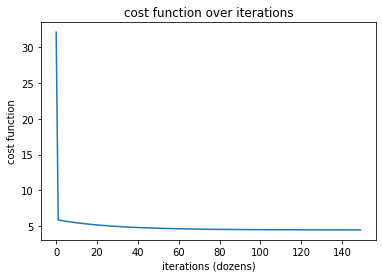

In [264]:
# plotting the cost-function over iterations
plt.plot(doc["cost"])
plt.xlabel("iterations (dozens)")
plt.ylabel("cost function")
plt.title("cost function over iterations")
plt.show()

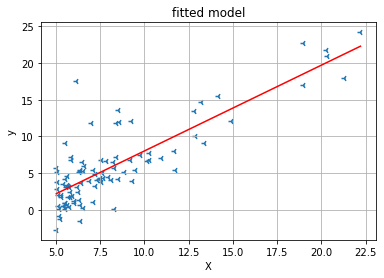

In [268]:
# graph of the fitted-model over the train data
visualize(X, y, doc["theta"][-1])

In [ ]:
# now, in order to make it all worth something, lets test the results over a test set!
# TODO!